# ***Project Titel:- internship Project - 🚗Automobile Imports Price***

## Business Case:-

* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#  **Imports and Configurations**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("auto_imports.csv",index_col=0)
df.head()

,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,,,,,,,,,,,,,,,,,,,,,
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
df.columns

Index(['?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd', 'front',
       '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27', '13495'],
      dtype='object')

# **Rename Columns**

In [4]:
columns_name = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"]

In [5]:
df = pd.read_csv("auto_imports.csv",header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.columns = columns_name

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# **Domain Analysis**

- **Symboling:**
  Numerical
  Indicates the insurance risk rating of the car (−3 = safest, +3 = risky).

-  **Normalized-losses**
  Numerical
  Represents the average insurance loss payment per insured car.

- **Make**
  Categorical
  The brand or manufacturer of the car (e.g., Toyota, BMW, Honda)

- **Fuel-type**
  Categorical
  Type of fuel used by the car — gas or diesel.

- **Aspiration**
  Categorical
  Engine aspiration: standard (normal air intake) or turbo (forced air intake).

- **Num-Of-Doors**
  Categorical
  Number of doors — two or four.

- **Body-style**
  Categorical
  Design or shape of the car — sedan, hatchback, convertible, etc.

- **Drive-wheels**
  Categorical
  Which wheels drive the car — front (fwd), rear (rwd), or 4-wheel (4wd).

- **Engine-Location**
  Categorical
  Location of the engine — front or rear.

- **Wheel-base**
   Numerical
   Distance between front and rear wheels (in inches).

- **Length**
  Numerical
  Overall length of the car (in inches).

- **Width**
  Numerical
  Width of the car (in inches).

- **Height**
  Numerical
  Height of the car (in inches).

- **Curb-weight**
  Numerical
  Weight of the car without passengers or cargo (in pounds).

- **engine-Type**
  Categorical
  Configuration of the engine — dohc, ohcv, rotor, etc.

- **Num-Of-Cylinders**
  Categorical
  Number of cylinders in the engine (three, four, six, etc.).

- **Engine-Size**
  Numerical
  Engine displacement measured in cubic centimeters (cc).

- **Fuel-System**
  Categorical
  Type of fuel delivery system — mpfi, 2bbl, idi, etc.

- **Bore**
  Numerical
  Diameter of the engine cylinder.

- **Stroke**
  Numerical
  Movement of piston inside cylinder.

- **Compression-Ratio**
  Numerical
  Ratio of engine cylinder volume when piston is down vs. up.

- **Horsepower**
  Numerical
  Engine power output.

- **Peak-Rpm**
  Numerical
  Maximum revolutions per minute of the engine.

- **City-Mpg**
  Numerical
  Fuel efficiency in city driving (miles per gallon).

- **Highway-Mpg**
  Numerical
  Fuel efficiency on highway driving (miles per gallon).

- **Price**
  Numerical(Target Variable)
  Selling price of the car in USD.
  

# Insights

#### Here we will drop the columns named as 'symboling','normalized-losses','num-of-doors','engine-location','fuel-system'
#### as these are not going to play a huge role to predict the price of car

In [9]:
df = df.drop(['symboling','normalized-losses','num-of-doors','engine-location','fuel-system'],axis=1)

In [10]:
df

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,2952,...,four,141,3.78,3.15,9.5,114,5400,23,28,16845
197,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,55.5,3049,...,four,141,3.78,3.15,8.7,160,5300,19,25,19045
198,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,55.5,3012,...,six,173,3.58,2.87,8.8,134,5500,18,23,21485
199,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,55.5,3217,...,six,145,3.01,3.40,23.0,106,4800,26,27,22470


# **Basic Check**

In [11]:
pd.set_option('display.max_rows', None) ## displaying all rows
df

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.00,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,four,130,3.47,2.68,9.00,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,six,152,2.68,3.47,9.00,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,four,109,3.19,3.40,10.00,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,five,136,3.19,3.40,8.00,115,5500,18,22,17450
5,audi,gas,std,sedan,fwd,99.8,177.3,66.3,53.1,2507,...,five,136,3.19,3.40,8.50,110,5500,19,25,15250
6,audi,gas,std,sedan,fwd,105.8,192.7,71.4,55.7,2844,...,five,136,3.19,3.40,8.50,110,5500,19,25,17710
7,audi,gas,std,wagon,fwd,105.8,192.7,71.4,55.7,2954,...,five,136,3.19,3.40,8.50,110,5500,19,25,18920
8,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,55.9,3086,...,five,131,3.13,3.40,8.30,140,5500,17,20,23875
9,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,54.3,2395,...,four,108,3.50,2.80,8.80,101,5800,23,29,16430


In [12]:
pd.set_option('display.max_column', None) ## displaying all rows
df

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.00,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.00,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.00,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.00,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.00,115,5500,18,22,17450
5,audi,gas,std,sedan,fwd,99.8,177.3,66.3,53.1,2507,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,15250
6,audi,gas,std,sedan,fwd,105.8,192.7,71.4,55.7,2844,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,17710
7,audi,gas,std,wagon,fwd,105.8,192.7,71.4,55.7,2954,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,18920
8,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,55.9,3086,ohc,five,131,3.13,3.40,8.30,140,5500,17,20,23875
9,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,54.3,2395,ohc,four,108,3.50,2.80,8.80,101,5800,23,29,16430


In [13]:
df.shape 

(201, 21)

In [14]:
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel-type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   body-style         201 non-null    object 
 4   drive-wheels       201 non-null    object 
 5   wheel-base         201 non-null    float64
 6   length             201 non-null    float64
 7   width              201 non-null    float64
 8   height             201 non-null    float64
 9   curb-weight        201 non-null    int64  
 10  engine-type        201 non-null    object 
 11  num-of-cylinders   201 non-null    object 
 12  engine-size        201 non-null    int64  
 13  bore               201 non-null    object 
 14  stroke             201 non-null    object 
 15  compression-ratio  201 non-null    float64
 16  horsepower         201 non

# inights

#### No any null values in the data

In [16]:
df.describe() # for statistical summary

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


* **insights**
   - The dataset includes a wide variety of cars, from big, potent luxury vehicles to small, light, fuel-efficient models.

   - The three main factors that affect a vehicle's cost—price, engine size, and curb weight—variably vary greatly.


   - The length, width, and height, on the other hand, show little variation because most cars follow the same body proportions.


In [17]:
df.describe(include = 'O').T

,count,unique,top,freq
make,201,22,toyota,32
fuel-type,201,2,gas,181
aspiration,201,2,std,165
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
bore,201,39,3.62,23
stroke,201,37,3.40,19
horsepower,201,59,68,19


* **insights**
  - Dataset has mixed categorical and numeric columns (some numeric stored as text).

  - Most cars are gasoline, front-engine, 4-cylinder sedans from brands like Toyota.

  - Columns like normalized-losses, bore, stroke, horsepower, peak-rpm need data cleaning (type conversion and missing value handling).

# **EDA Exploratory Data Analysis**

# ***Univariate Analysis***

In [18]:
df

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.00,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.00,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.00,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.00,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.00,115,5500,18,22,17450
5,audi,gas,std,sedan,fwd,99.8,177.3,66.3,53.1,2507,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,15250
6,audi,gas,std,sedan,fwd,105.8,192.7,71.4,55.7,2844,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,17710
7,audi,gas,std,wagon,fwd,105.8,192.7,71.4,55.7,2954,ohc,five,136,3.19,3.40,8.50,110,5500,19,25,18920
8,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,55.9,3086,ohc,five,131,3.13,3.40,8.30,140,5500,17,20,23875
9,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,54.3,2395,ohc,four,108,3.50,2.80,8.80,101,5800,23,29,16430


In [19]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=['object']).columns

print('numeric columns: \n', num_cols)
print('categorical columns: \n', cat_cols)

numeric columns: 
 Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
categorical columns: 
 Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-type', 'num-of-cylinders', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')


# ***Numerical column Univariate Analysis***

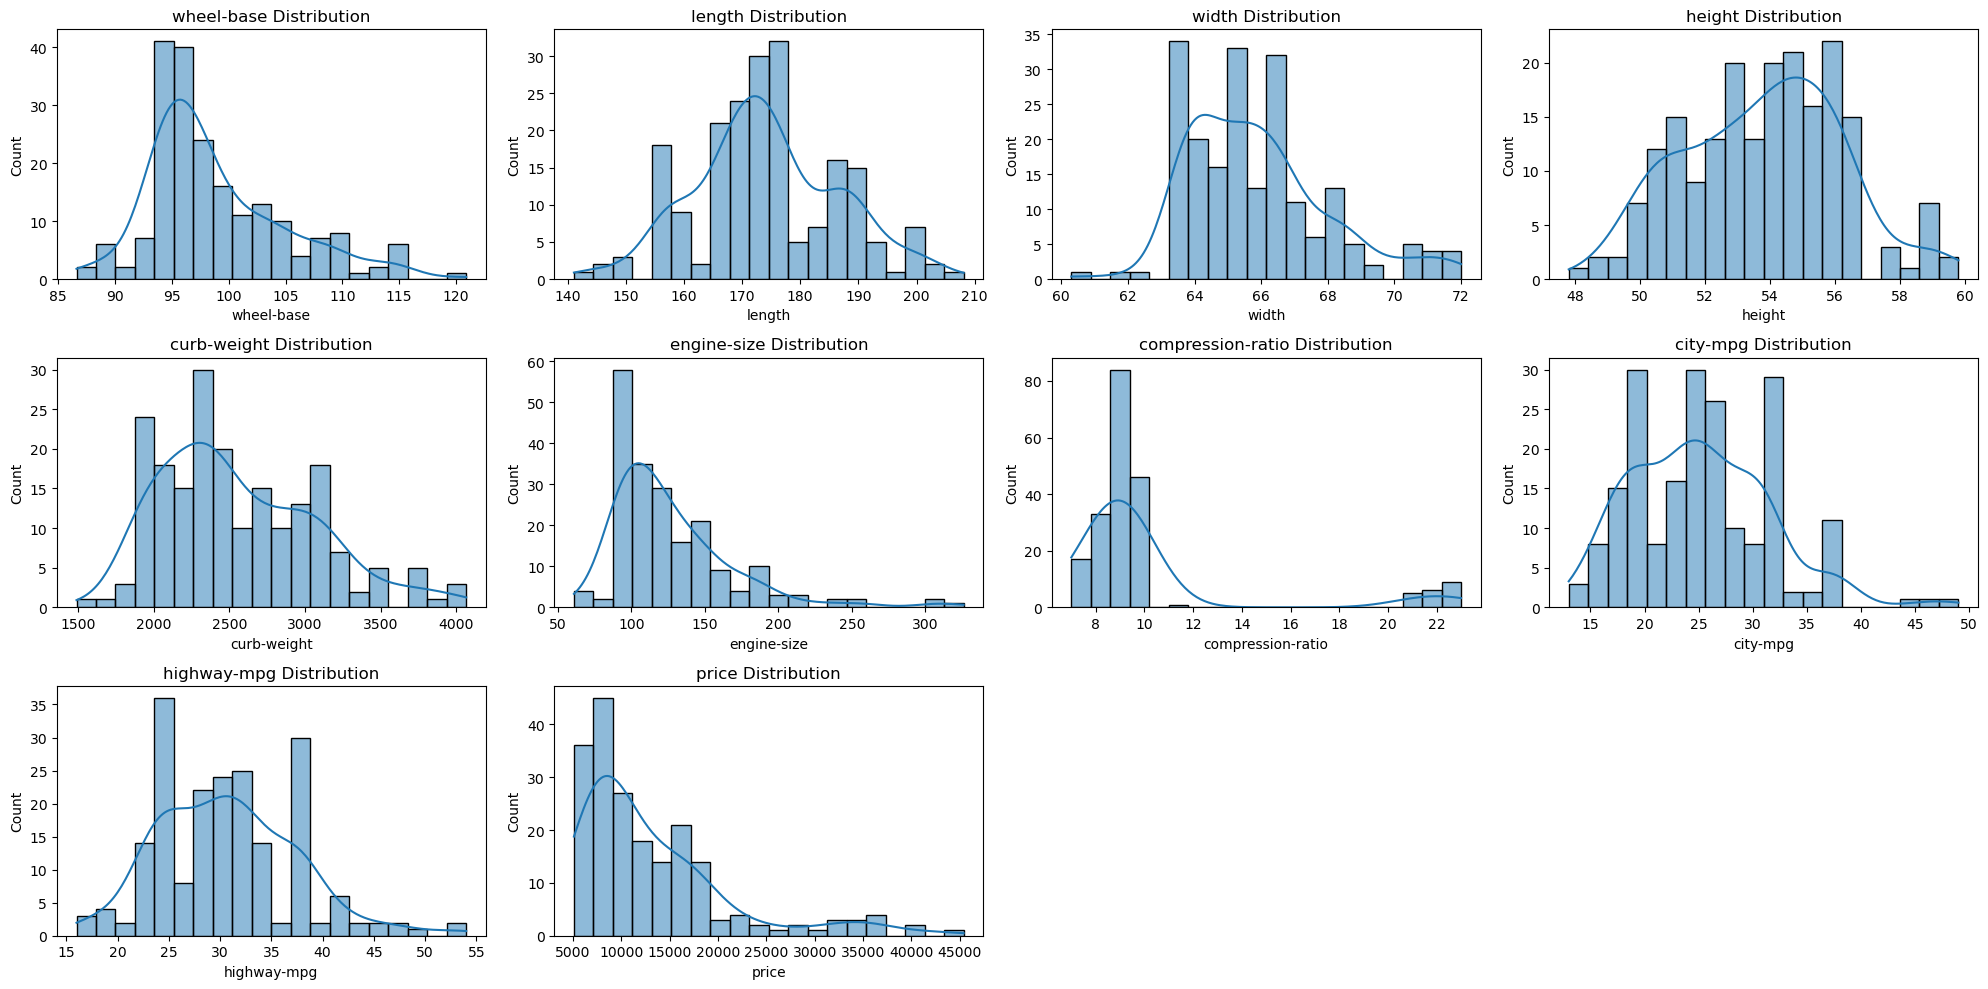

In [20]:
pltn = 1
plt.figure(figsize=(20,10))

for col in num_cols:
    plt.subplot(3,4,pltn)
    sns.histplot(df[col],kde=True,bins=20)
    plt.title(f'{col} Distribution')
    pltn = pltn + 1
plt.tight_layout()
plt.show()

# **ingsinghts***
- Symbolizing represents risk rating, most cars fall in neutral or safe zones, with few high-risk designsalso included
- Majority of cars have standard wheel-base, while some luxury models have extended bases for stability
- Most vehicles are mid-sized sedans only a few are long luxury cars
- Width is consistent for most cars few premium vehicles are wider than 70 inches
- Height shows little variation most cars fall in a uniform size category
- Majority are lightweight to mid-weight cars heavier vehicles belong to luxury or performance segments
- Dataset dominated by compact engines only few cars have large, high-performance engines
- Typical compression ratios cluster around 9 very high ratios belong to sports/high-efficiency engines
- Most cars give moderate mileage few highly efficient small cars achieve 40+ mpg
- Highway mileage generally higher than city, following expected pattern
- Most cars priced between ₹5k–₹15k, with few luxury outliers up to ₹45k

# ***Categorical Univariate Analysis***

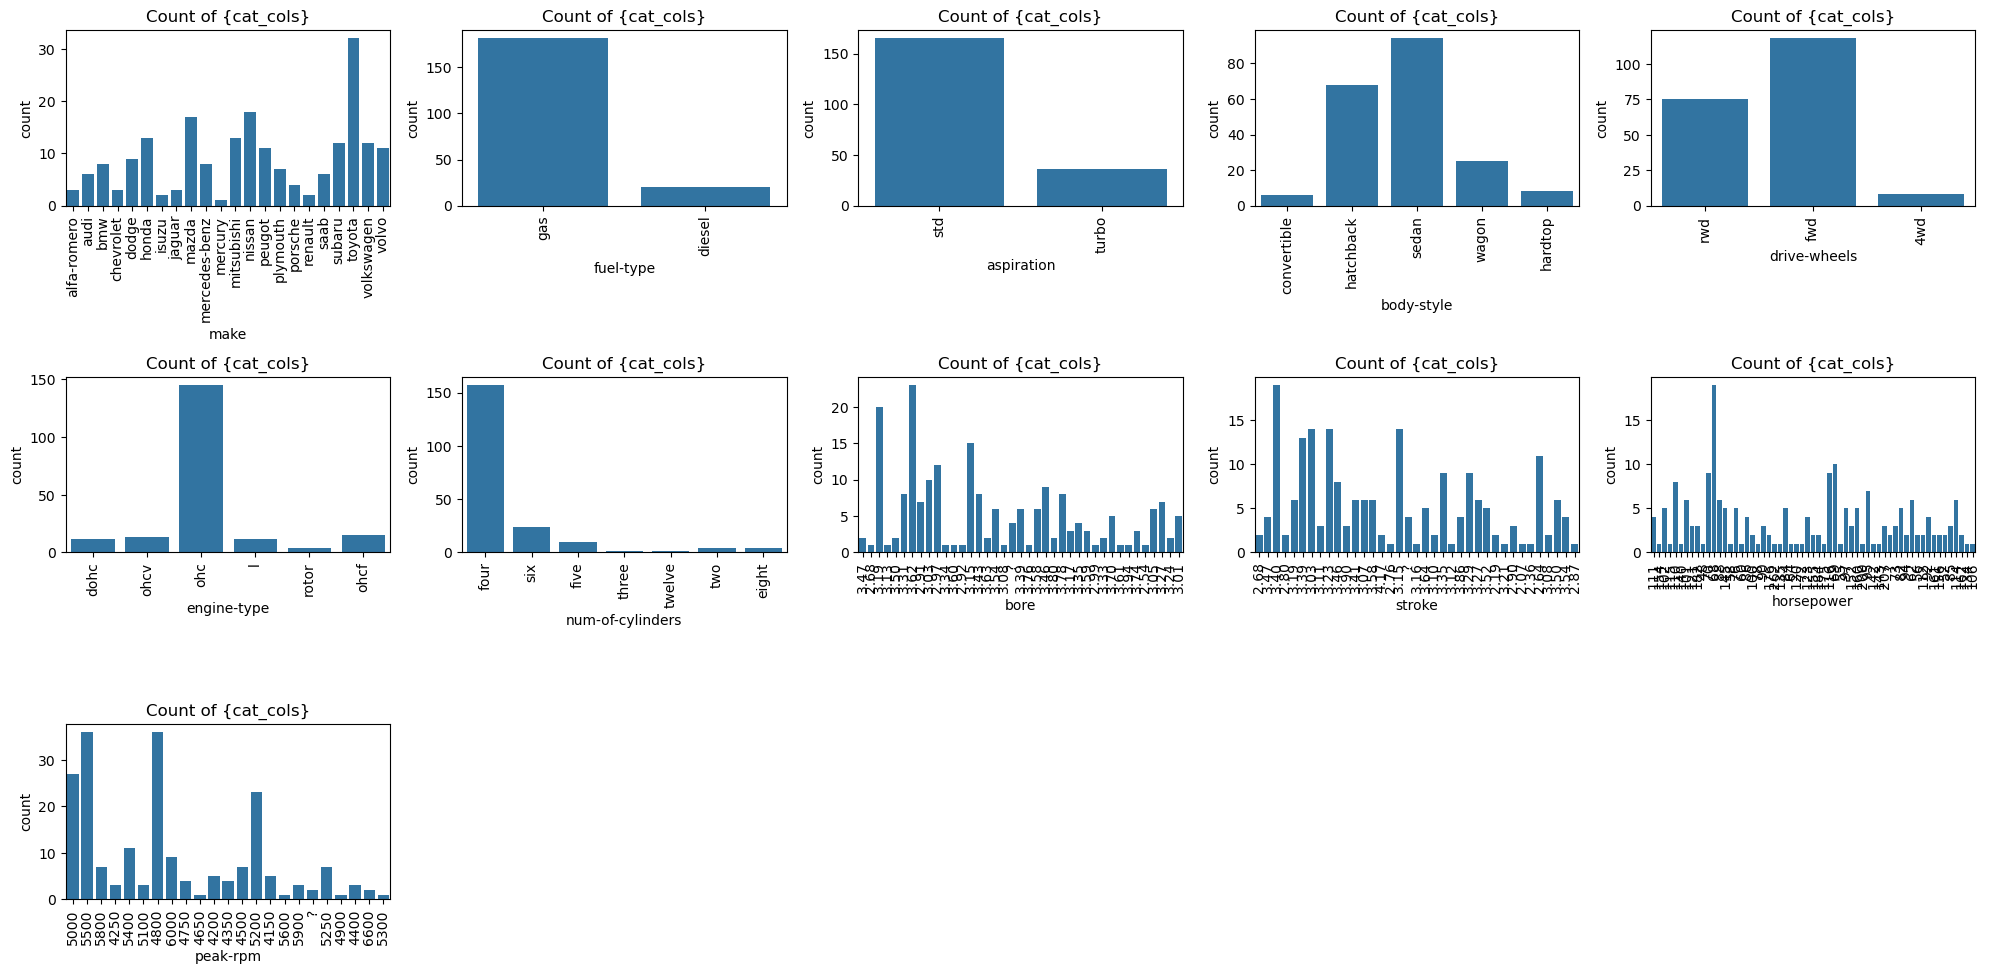

In [21]:
plt.figure(figsize=(20,30))
plot = 1

for i in cat_cols:
    if plot <= 43:
        plt.subplot(9, 5, plot)
        sns.countplot( x=i, data=df)
        plt.title('Count of {cat_cols}',)
        plt.xticks(rotation=90)
        plot += 1
        
plt.tight_layout()
plt.show()

# *Insight*
- The majority of the Japanese automobiles in the sample are mid-range models.

- The dataset has a strong bias in favor of gas-powered vehicles.

- Cars with turbochargers are rather uncommon.

- Sedans, or four-door vehicles, predominate; these are useful, family-friendly versions.

- Regular passenger cars make up the majority of the dataset.

- The majority of cars, especially the more affordable models, have front-wheel drive.

- Cars with rear engines are incredibly uncommon.

- OHC engines, which are prevalent in mass-market automobiles, power the majority of cars.

- Small and medium-sized engines, not high-performance vehicles, make up the majority of the dataset.

- Carbureted systems (1bbl/2bbl) are less popular in modern autos.

- For accurate analysis, these columns need to be translated to numbers.




# **Numerical Bivariate Analysis**

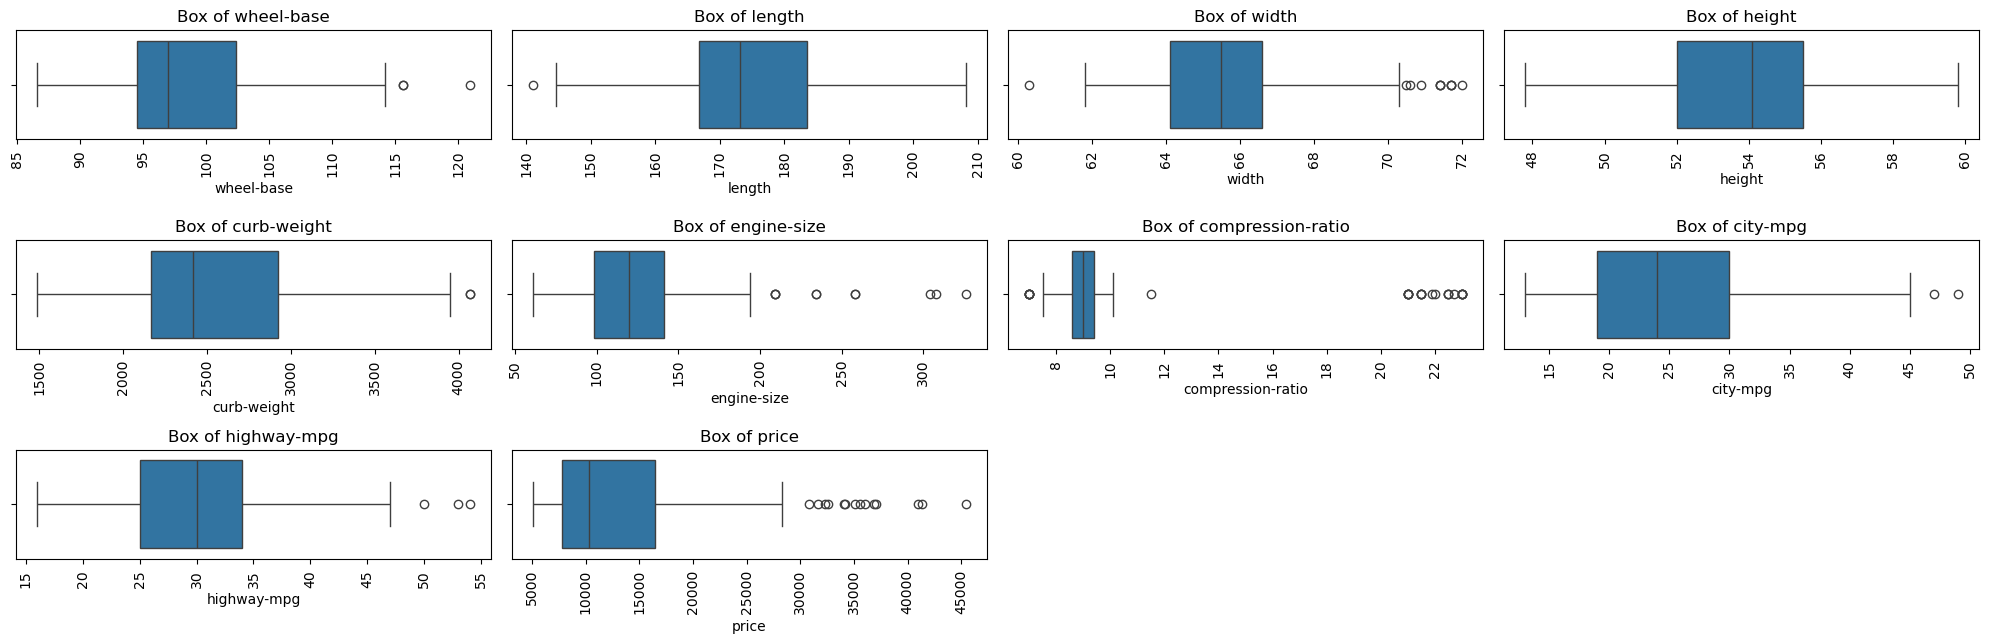

In [22]:
plt.figure(figsize=(20, 10))
plot = 1

for i in num_cols:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.boxplot(x=i, data=df)   
        plt.title(f"Box of {i}")
        plt.xticks(rotation=90)       
        plot += 1

plt.tight_layout()
plt.show()

# *Insight*
- The risk factor, or symboling, generally remains in the range of average to considerable insurance risk.
- A few premium or large cars have extended wheelbases, while the majority of cars have normal wheelbases.
- The majority of cars are mid-sized, with small and luxury models being the exceptions.
- The majority of cars have standard width, although some (sports or luxury cars) are wider.
- Heights are standard for sedans and hatchbacks.
- The majority are light vehicles; the bulkier ones are probably luxury or high-performance vehicles.
- There are a few cars with exceptionally huge engines (sports/luxury), but small engines are the norm.
- Regular gasoline engines have standard compression; high ratios could be a sign of performance or diesel engines.
- Mid-size sedan average mileage; tiny, fuel-efficient vehicles are probably represented by high outliers.
- Although most cars are fuel-efficient, there are a few that have exceptionally high mileage.
- The majority of the cars in the dataset are mid-range or inexpensive, although a few high-end or sports models      raise the price range.

# ***Correlation Analysis***

# **Categorical Bivariate Analysis**

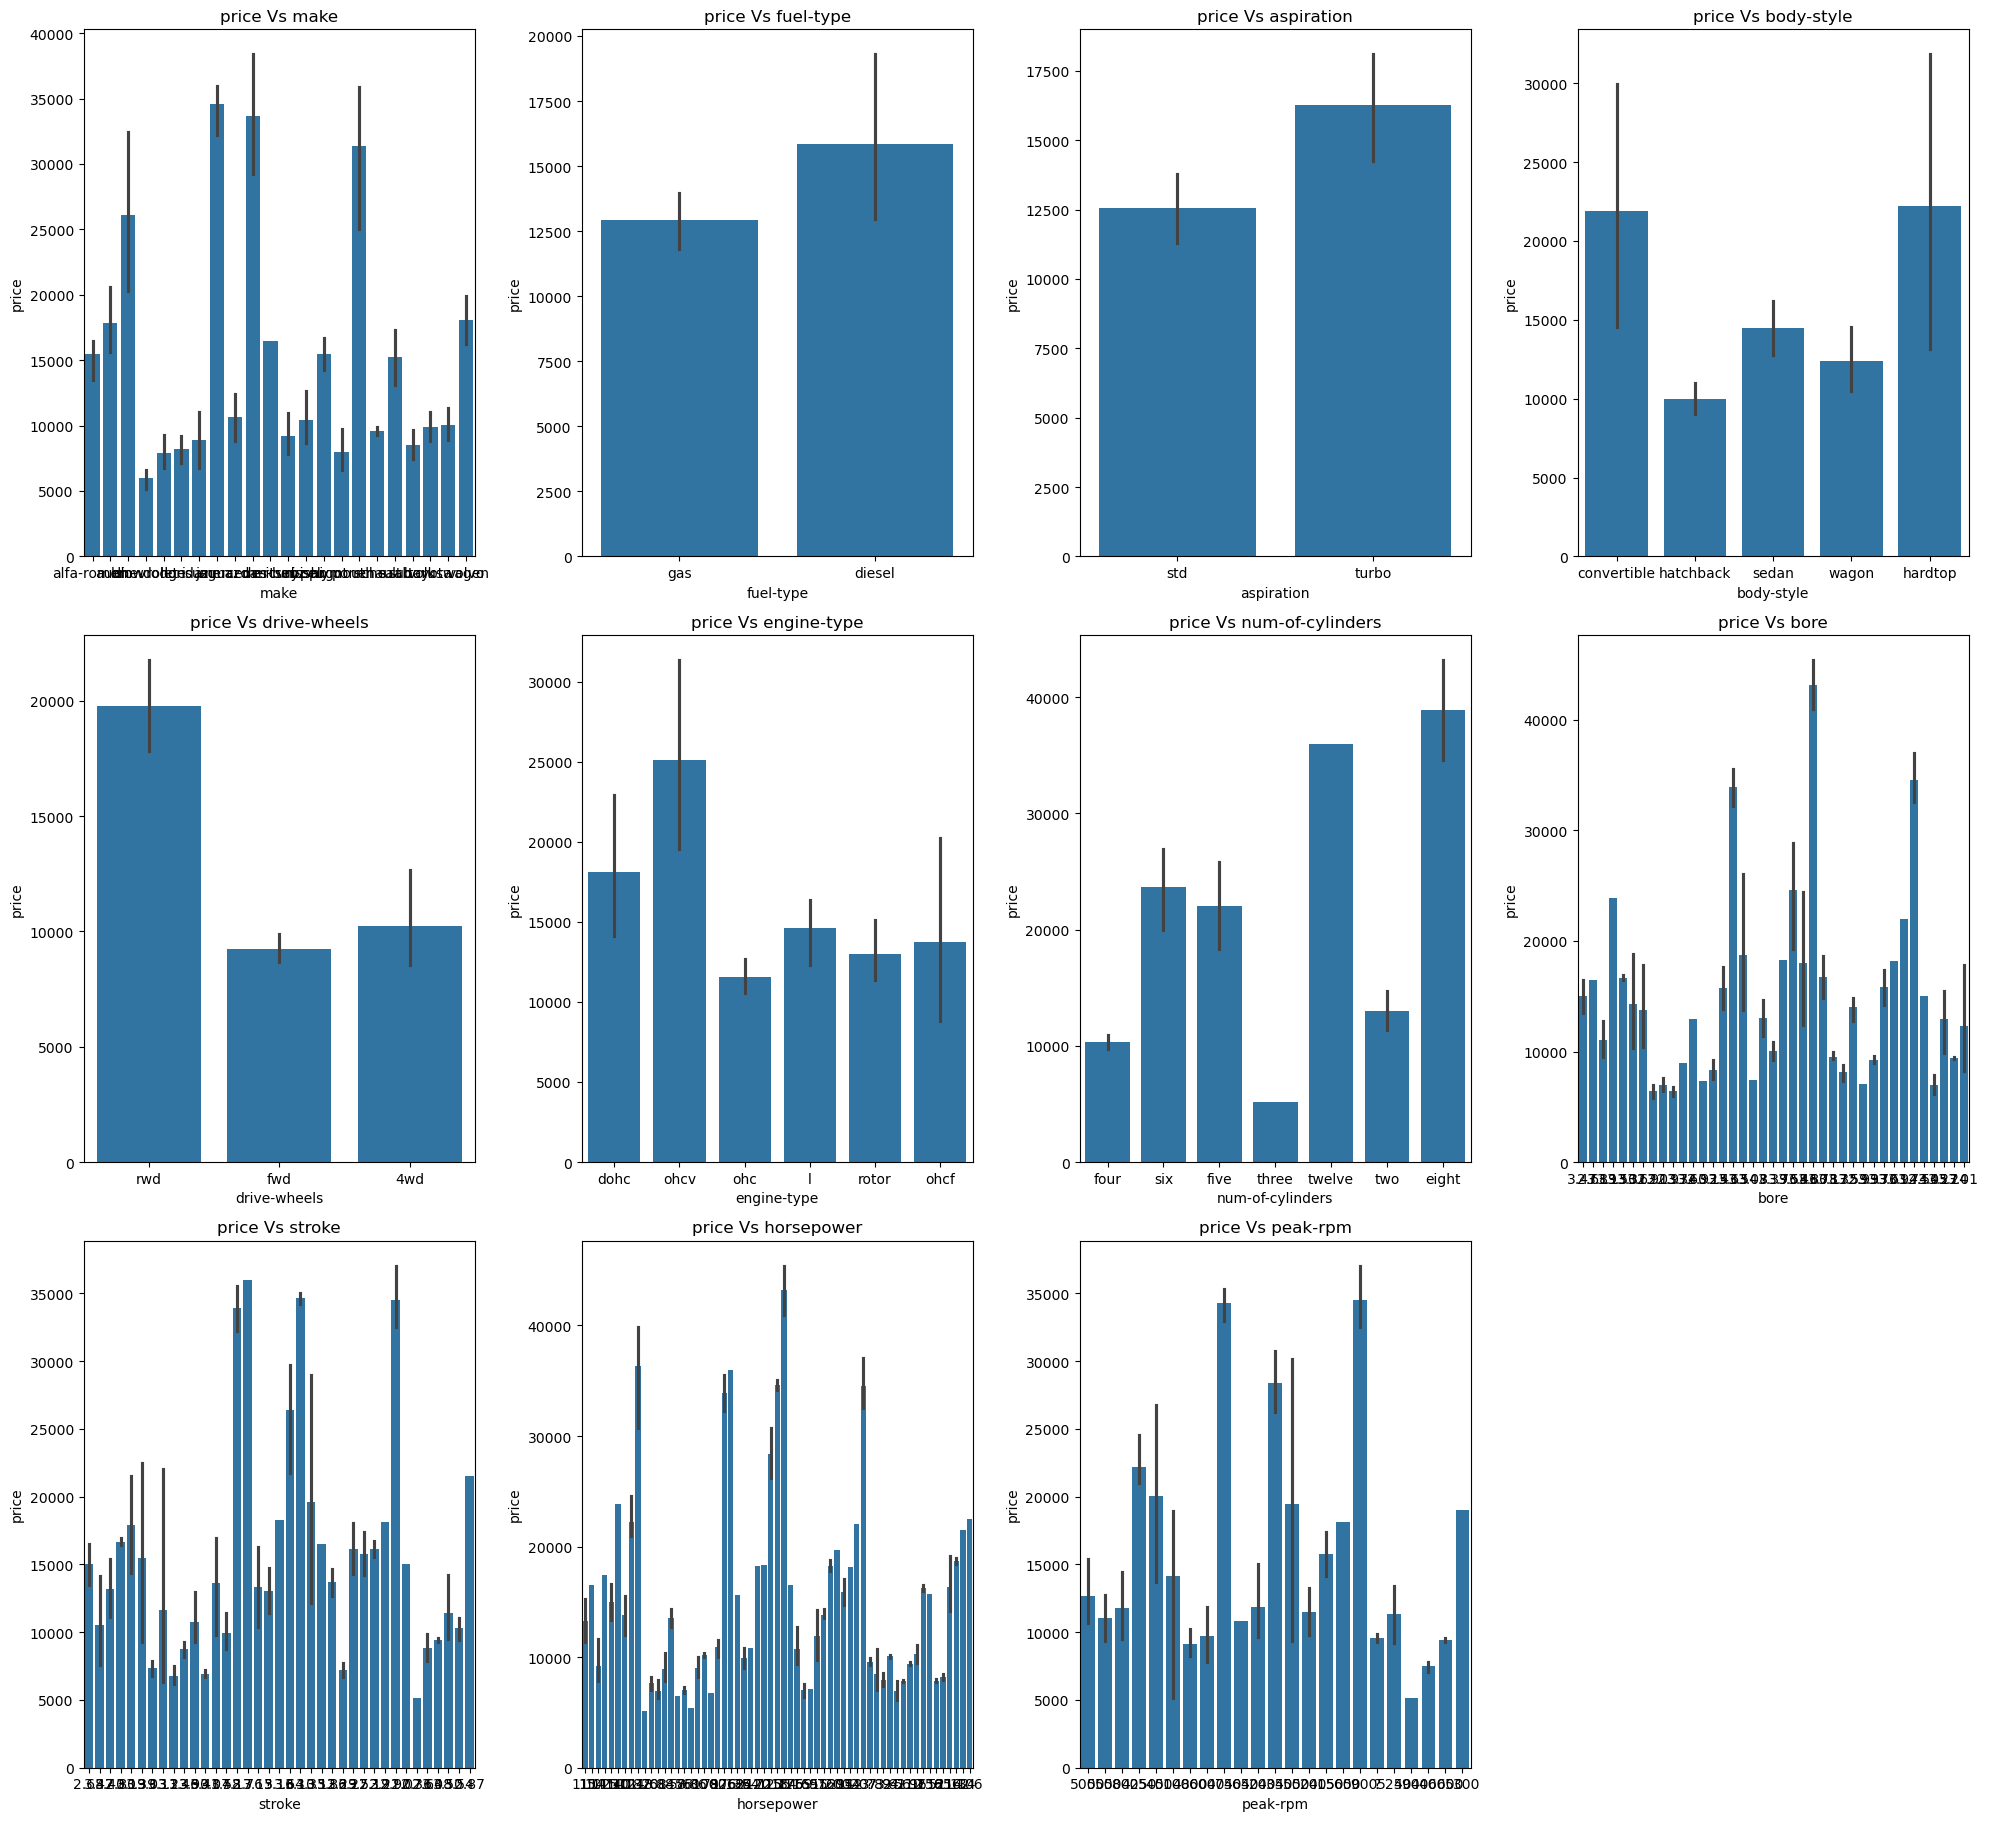

In [23]:
plt.figure(figsize=(20, 30))
plot = 1

for i in cat_cols:   
    if plot <= 18:
        plt.subplot(5, 4, plot)
        sns.barplot(x=i, y='price', data=df)
        plt.title(f"price Vs {i}")
        plot += 1

plt.tight_layout()
plt.show()

# *Insight*
- This feature may not have a significant impact on price due to the weak direct relationship.
- The brand of a car has a significant impact on its cost.  Prices are greater for premium brands.
- Diesel engines are more expensive because they are more durable and efficient.
- Turbocharged engines are more expensive yet are regarded as performance enhancements.
- Four-door vehicles are more affordable and geared toward families, while two-door vehicles might be sporty or       luxurious.
- Price is greatly influenced by body type; luxury and athletic types are more expensive.
- RWD automobiles are more expensive and are frequently sports or performance vehicles.
- Cars with rear engines, like Porsches, are expensive and uncommon.
- Higher prices are a result of advanced engine designs.
- The car's worth is directly increased by engine power.
- Higher costs and improved performance are associated with advanced fuel systems.
- Bore and stroke are secondary mechanical attributes, while horsepower is a significant determinant of cost.

# ***Multivariate Analysis***

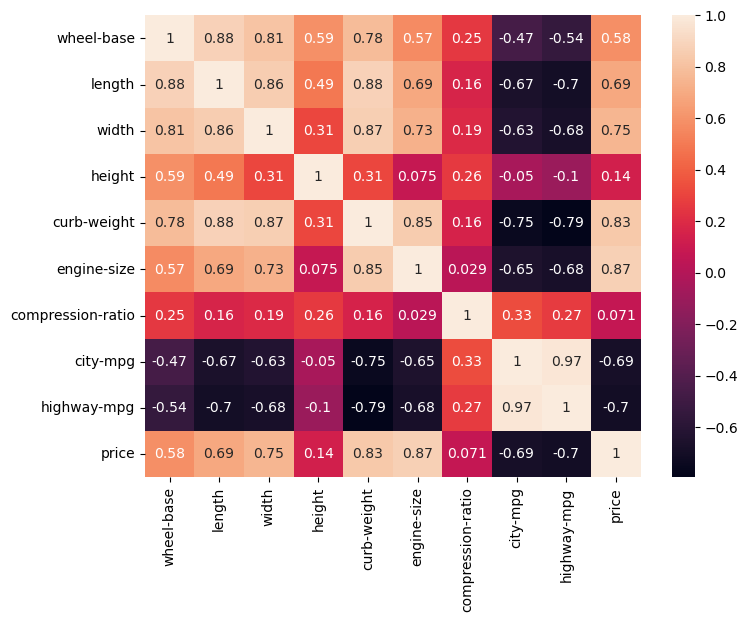

In [24]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

# *insight*
- Increases in engine capacity, weight, width, length, and wheel base result in higher prices.
- When fuel efficiency (mpg) rises, prices fall.
- The best indicators of price:
   - Engine dimensions
   - Curb-weight
   - The width
   - Length
- The least significant factors are height, compression ratio, and symbolism.
- Here we will drop the feature named as Highway-mpg cause highway-mpg and city-mpg both are highly correlated wih each other

In [25]:
df= df.drop(['highway-mpg'],axis=1)

# **Data preproccesing**

In [26]:
df.isnull().sum()    # checking for missing values

make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
price                0
dtype: int64

# checking for currepted values

In [27]:
for col in df.columns:
    bad = df[col].astype(str).str.contains(r'[^0-9\.\-a-zA-Z ]', regex=True)
    if bad.any():
        print(f"\nCorrupted values in column: {col}")
        print(df.loc[bad, col].unique())



Corrupted values in column: bore
['?']

Corrupted values in column: stroke
['?']

Corrupted values in column: horsepower
['?']

Corrupted values in column: peak-rpm
['?']


In [28]:
for col in df.columns:
    print(f"\n------ {col} ------")
    print(df[col].unique()[:20])  # first 20 unique values



------ make ------
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota']

------ fuel-type ------
['gas' 'diesel']

------ aspiration ------
['std' 'turbo']

------ body-style ------
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

------ drive-wheels ------
['rwd' 'fwd' '4wd']

------ wheel-base ------
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3]

------ length ------
[168.8 171.2 176.6 177.3 192.7 176.8 189.  193.8 197.  141.1 155.9 158.8
 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5]

------ width ------
[64.1 65.5 66.2 66.4 66.3 71.4 64.8 66.9 67.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8]

------ height ------
[48.8 52.4 54.3 53.1 55.7 55.9 53.7 56.3 53.2 52.  50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51. ]

------ curb-weight ------
[

# Handlling currepted values

In [29]:
import pandas as pd
import numpy as np

# List of columns with corrupted values ('?')
corrupted_cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

#  Replace '?' with NaN
df[corrupted_cols] = df[corrupted_cols].replace('?', np.nan)

#  Converting columns to numeric
for col in corrupted_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#  Fill missing values with median (robust for skewed data)
for col in corrupted_cols:
    df[col].fillna(df[col].median(), inplace=True)




In [30]:
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154.0,5000.0,19,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102.0,5500.0,24,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115.0,5500.0,18,17450


## **Chakcing Duplicate Rows**

In [31]:
df.duplicated().sum()

0

## **insigths**

- there is no duplicate values 

# **Detecting Outliers**

In [32]:
df.columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price'],
      dtype='object')

In [33]:
# Continuous numeric features
continuous_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 
                   'engine-size', 'bore', 'stroke', 'compression-ratio', 
                   'horsepower', 'peak-rpm', 'city-mpg']


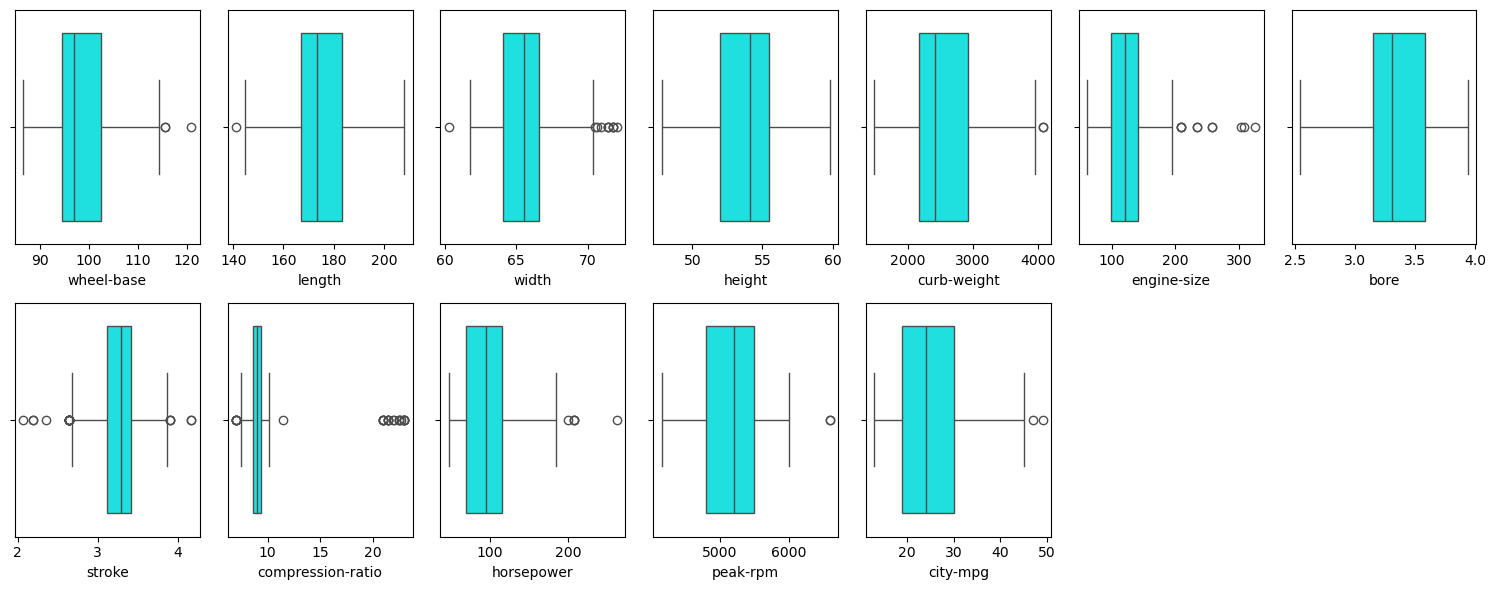

In [34]:
plt.figure(figsize=(15,6))      # defined size of graph using matplotlib library
for i, col in enumerate(continuous_cols, 1):   # applied the loop
    plt.subplot(2, 7, i)  # create a grid of 2x2 plots
    sns.boxplot(x=df[col], color='cyan')   # applied boxplot to detect Outliers
    plt.xlabel(col)

plt.tight_layout()      # help to stop the overlapping
plt.show()    # shows the graphs

# **Removing Outliers by IQR**

In [35]:
outlier_features= [
    'wheel-base','length','width','curb-weight','engine-size','stroke','compression-ratio','horsepower','peak-rpm','city-mpg']
for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    median_value = df[col].median()
    df.loc[outliers, col] = median_value

    print(f"Column: {col} → Outliers replaced with median ({median_value})")

Column: wheel-base → Outliers replaced with median (97.0)
Column: length → Outliers replaced with median (173.2)
Column: width → Outliers replaced with median (65.5)
Column: curb-weight → Outliers replaced with median (2414.0)
Column: engine-size → Outliers replaced with median (120.0)
Column: stroke → Outliers replaced with median (3.29)
Column: compression-ratio → Outliers replaced with median (9.0)
Column: horsepower → Outliers replaced with median (95.0)
Column: peak-rpm → Outliers replaced with median (5200.0)
Column: city-mpg → Outliers replaced with median (24.0)


In [36]:
df.shape

(201, 20)

# **Categorical Columns Encoding**

In [37]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-type', 'num-of-cylinders'],
      dtype='object')


In [38]:
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154.0,5000.0,19,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102.0,5500.0,24,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115.0,5500.0,18,17450


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-type', 'num-of-cylinders'],
      dtype='object')


In [41]:
lab_cols = ['fuel-type','aspiration']

# *lable encoding*

In [42]:
le = LabelEncoder()

for col in lab_cols:
    df[col] = df[col].astype(str)      
    df[col] = le.fit_transform(df[col])

# *One-Hot encoding*

In [43]:
onehot_cols = ['make','body-style','drive-wheels','engine-type']

In [44]:
df = pd.get_dummies(df, columns=onehot_cols, dtype=int)

In [45]:
df.head()

,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1,0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,1,0,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


# Ordinal encoding


In [46]:
ordinal_cols = [ 'num-of-cylinders']
cylinder_order =[['two','three','four','five','six','eight','twelve']]

In [47]:
cyl_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_map)
print(df[['num-of-cylinders']].head())

   num-of-cylinders
0                 4
1                 4
2                 6
3                 4
4                 5


In [48]:
df.shape

(201, 52)

In [49]:
df.head()

,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fuel-type               201 non-null    int32  
 1   aspiration              201 non-null    int32  
 2   wheel-base              201 non-null    float64
 3   length                  201 non-null    float64
 4   width                   201 non-null    float64
 5   height                  201 non-null    float64
 6   curb-weight             201 non-null    int64  
 7   num-of-cylinders        201 non-null    int64  
 8   engine-size             201 non-null    int64  
 9   bore                    201 non-null    float64
 10  stroke                  201 non-null    float64
 11  compression-ratio       201 non-null    float64
 12  horsepower              201 non-null    float64
 13  peak-rpm                201 non-null    float64
 14  city-mpg                201 non-null    in

In [51]:
df.shape

(201, 52)

In [52]:
df.columns

Index(['fuel-type', 'aspiration', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor'],
      dtype='object')

# **Model Selection**

In [53]:
X =  df.drop("price", axis = 1)

In [54]:
X

,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.00,111.0,5000.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.00,111.0,5000.0,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.00,154.0,5000.0,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.00,102.0,5500.0,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.00,115.0,5500.0,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
5,1,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.50,110.0,5500.0,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6,1,0,105.8,192.7,65.5,55.7,2844,5,136,3.19,3.40,8.50,110.0,5500.0,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7,1,0,105.8,192.7,65.5,55.7,2954,5,136,3.19,3.40,8.50,110.0,5500.0,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,1,1,105.8,192.7,65.5,55.9,3086,5,131,3.13,3.40,8.30,140.0,5500.0,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
9,1,0,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.80,101.0,5800.0,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [55]:
y = df.price 

In [56]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
5      15250
6      17710
7      18920
8      23875
9      16430
10     16925
11     20970
12     21105
13     24565
14     30760
15     41315
16     36880
17      5151
18      6295
19      6575
20      5572
21      6377
22      7957
23      6229
24      6692
25      7609
26      8558
27      8921
28     12964
29      6479
30      6855
31      5399
32      6529
33      7129
34      7295
35      7295
36      7895
37      9095
38      8845
39     10295
40     12945
41     10345
42      6785
43     11048
44     32250
45     35550
46     36000
47      5195
48      6095
49      6795
50      6695
51      7395
52     10945
53     11845
54     13645
55     15645
56      8845
57      8495
58     10595
59     10245
60     10795
61     11245
62     18280
63     18344
64     25552
65     28248
66     28176
67     31600
68     34184
69     35056
70     40960
71     45400
72     16503
73      5389
74      6189
75      6669
76      7689

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [58]:
# Model implimention 

In [59]:
X_test

,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
71,1,0,112.0,199.2,65.5,55.4,3715,8,120,3.80,3.35,8.0,184.0,4500.0,14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
24,1,0,93.7,157.3,63.8,50.6,1989,4,90,2.97,3.23,9.4,68.0,5500.0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
51,1,0,93.1,166.8,64.2,54.1,1950,4,91,3.08,3.15,9.0,68.0,5000.0,31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
174,1,0,102.9,183.5,67.7,52.0,2976,6,171,3.27,3.35,9.3,161.0,5200.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
97,1,0,97.2,173.4,65.2,54.7,2302,4,120,3.33,3.47,8.5,97.0,5200.0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
40,1,0,96.5,175.4,65.2,54.1,2465,4,110,3.15,3.58,9.0,101.0,5800.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
124,1,0,89.5,168.9,65.0,51.6,2756,6,194,3.74,2.90,9.5,95.0,5900.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
84,1,1,96.3,172.4,65.4,51.6,2403,4,110,3.17,3.46,7.5,116.0,5500.0,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
142,1,0,97.0,173.5,65.4,53.0,2290,4,108,3.62,3.29,9.0,82.0,4800.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
131,1,0,99.1,186.6,66.5,56.1,2758,4,121,3.54,3.07,9.3,110.0,5250.0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [60]:
y_test

71     45400
24      6692
51      7395
174    16558
97      9549
40     12945
124    34028
84      9279
142     7463
131    15510
133    18620
165     9989
149     6918
156     7738
116     7957
198    21485
196    16845
98     13499
53     11845
192    15985
9      16430
46     36000
195    18950
49      6795
50      6695
66     28176
110    16695
175    15998
44     32250
65     28248
43     11048
36      7895
80     14869
63     18344
92      7799
14     30760
89      6849
76      7689
170    10698
81     14489
82      6989
Name: price, dtype: int64

In [61]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

print("Before scaling:\n", X.head())
print("\nAfter scaling (train):\n", X_train_scaled[:5])


Before scaling:
    fuel-type  aspiration  wheel-base  length  width  height  curb-weight  \
0          1           0        88.6   168.8   64.1    48.8         2548   
1          1           0        88.6   168.8   64.1    48.8         2548   
2          1           0        94.5   171.2   65.5    52.4         2823   
3          1           0        99.8   176.6   66.2    54.3         2337   
4          1           0        99.4   176.6   66.4    54.3         2824   

   num-of-cylinders  engine-size  bore  stroke  compression-ratio  horsepower  \
0                 4          130  3.47    2.68                9.0       111.0   
1                 4          130  3.47    2.68                9.0       111.0   
2                 6          152  2.68    3.47                9.0       154.0   
3                 4          109  3.19    3.40               10.0       102.0   
4                 5          136  3.19    3.40                8.0       115.0   

   peak-rpm  city-mpg  make_alfa-romero

# **Model Implimantetion**

# **Linear Regresion**

In [62]:
from sklearn.linear_model import LinearRegression    # Import Linear Regression model
from sklearn.metrics import r2_score, mean_squared_error
 
lr = LinearRegression()         # Create Linear Regression object
lr.fit(X_train, y_train)    # Train the model on training data

y_pred = lr.predict(X_test)  # Predict target values for test set and stored in variable named y_pred
y_pred_train = lr.predict(X_train)    # Predict target values for training set and stored in variable named y_pred_train


print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))

Training r2_score: 0.9678068843186461
Testing r2_score: 0.7943002622014086


# **XGBoosting**

In [63]:
from xgboost import XGBRegressor              # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

xgb = XGBRegressor()                          # Create XGBoost model object
xgb.fit(X_train, y_train)                     # Train model on training data

y_pred = xgb.predict(X_test)                  # Predictions for test set
y_pred_train = xgb.predict(X_train)           # Predictions for training set

print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))


Training r2_score: 0.9990667700767517
Testing r2_score: 0.8619471192359924


# SVR

In [64]:
from sklearn.svm import SVR                    # Import SVR model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# SVR requires scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

svr = SVR()                                    # Create SVR model object
svr.fit(X_train_scaled, y_train_scaled)        # Train model

y_pred_scaled = svr.predict(X_test_scaled)     # Predictions (scaled)
y_pred_train_scaled = svr.predict(X_train_scaled)

# Inverse scaling to get original values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1,1)).ravel()

print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))


Training r2_score: 0.9201192389397973
Testing r2_score: 0.6887072410444096


# **Random Forest Regressior**

In [65]:
from sklearn.ensemble import RandomForestRegressor      # Import Random Forest
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(random_state=99)             # Create model object
rf.fit(X_train, y_train)                                # Train model

y_pred = rf.predict(X_test)                             # Test set predictions
y_pred_train = rf.predict(X_train)                      # Train set predictions

print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))


Training r2_score: 0.9824623633945854
Testing r2_score: 0.9309800643730977


# HYPERPARAMETER OF RANDOM FOREST

In [66]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import r2_score, mean_squared_error

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestRegressor(random_state=0)

# grid = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best CV Score:", grid.best_score_)

# # Train model with best parameters
# best_rf = grid.best_estimator_

# y_pred = best_rf.predict(X_test)
# y_pred_train = best_rf.predict(X_train)

# print("Training r2_score:", r2_score(y_train, y_pred_train))
# print("Testing r2_score:", r2_score(y_test, y_pred))


# DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeRegressor        # Import Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=0)           # Create Decision Tree model object
dt.fit(X_train, y_train)                              # Train the model

y_pred = dt.predict(X_test)                           # Predict for test set
y_pred_train = dt.predict(X_train)                    # Predict for training set

print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))


Training r2_score: 0.9990680731818881
Testing r2_score: 0.8321827967331781


# HYPERPARAMETER OF DECISION TREE

In [68]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

dt = DecisionTreeRegressor(random_state=99)

# GridSearchCV
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Train model with best parameters
best_dt = grid.best_estimator_

y_pred = best_dt.predict(X_test)
y_pred_train = best_dt.predict(X_train)

print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred))


Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.7353744745194014
Training r2_score: 0.997831251687053
Testing r2_score: 0.8379614314945776


# Adabooster Regressor

In [69]:
from sklearn.ensemble import AdaBoostRegressor


# Create AdaBoost Regressor model
adaboost_reg = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=1.0,
    random_state=99
)
adaboost_reg.fit(X_train, y_train)
y_pred_test = adaboost_reg.predict(X_test)
y_pred_train = adaboost_reg.predict(X_train)
print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred_test))
print("Training RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Testing RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))


Training r2_score: 0.9498052025099187
Testing r2_score: 0.9012135414855702
Training RMSE: 1654.210124195432
Testing RMSE: 2951.3360527992418


# KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(X_train, y_train)


y_pred_test = knn_reg.predict(X_test)
y_pred_train = knn_reg.predict(X_train)


print("Training r2_score:", r2_score(y_train, y_pred_train))
print("Testing r2_score:", r2_score(y_test, y_pred_test))

print("Training RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Testing RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))


Training r2_score: 0.7979227652697776
Testing r2_score: 0.7823662570229312
Training RMSE: 3319.097547564699
Testing RMSE: 4380.5946721822165


In [71]:
results = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor", "Decision Tree Regressor (Hyperparameter)",
        "Random Forest Classifier", 
        "KNN Classifier",
        "XGBOOST Classifier",
        "Adabooster classifie",
        "SVR"
    ],
    "Testing Accuracy": [
        0.7943002622014086,
        0.8321827967331781, 0.8379614314945776,
        0.9309800643730977, 
        0.7823662570229312,
        0.8619471192359924,
        0.9012135414855702,
        0.6887072410444096,
        
    ],
    "Training Accuracy": [
        0.9678068843186461, 
        0.9990680731818881, 0.997831251687053,
        0.9824623633945854, 
        0.7979227652697776,
        0.9990667700767517,
        0.9498052025099187,
        0.9201192389397973,
    ]
}

df1 = pd.DataFrame(results)

from IPython.display import display
display(df1)

,Model,Testing Accuracy,Training Accuracy
0,Linear Regression,0.794300,0.967807
1,Decision Tree Regressor,0.832183,0.999068
2,Decision Tree Regressor (Hyperparameter),0.837961,0.997831
3,Random Forest Classifier,0.930980,0.982462
4,KNN Classifier,0.782366,0.797923
5,XGBOOST Classifier,0.861947,0.999067
6,Adabooster classifie,0.901214,0.949805
7,SVR,0.688707,0.920119


# Conclusion of Model

I have used 7 Algorithms which name are LinearRegression, DecisionTreeRegressor, RandomForestregressor, KNN,XGBOOSTB Regressor and AdaBooster regressor for training and testing the model.
I got 93 percentage(Testing) in __Random Forest regressior and 98 percentage(training)__ which is maximum than all Algorithms and its working Mindblowing some time prediction margin are few far even,after that model predict perfect result.
So,I am perfering __Random Forest__ for Autoprice prediction.

# Report on challenges faced

* This is a __Autoprice Prediction__ which has __201__ entries,and total columns are __26__.  Where 5        columns having __int64 datatype__ and 5 column having float datatype and 11 columns having object datatype and one is target feature which is in continuous nature.
* In our dataset no columns having  missing value.
* There are some continuous feature in our dataset in which i had handled Outliers.
* 

In [72]:
import pickle
pickle.dump(rf,open("Model.pkl","wb"))
pickle.dump(X.columns, open("columns.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


## Pickle is used to save and load a model

* #### This model has been deployed so that people can easily interact with it and understand its purpose.
* #### When a model exists only in code, it is mainly useful for developers and engineers.
* #### Deployment makes it accessible to everyone, allowing users to experience how the model works in real life.
* #### It helps demonstrate what the Autoprice Prediction model means and how its predictions can be useful.
* #### In short, deployment bridges the gap between technical development and real-world understanding.
* #### by this vision i had deployed this model